## XAI(Explainable Artificial Intelligence, 설명 가능한 인공지능)
현실 문제에 신경망 모델을 적용할 때에는 실습 문제를 풀 때처럼 단순히 모델의 가중치(weight)를 최적화하는 과정만을 믿고, 곧바로 모델이 올바르게 동작한다고 넘겨짚기는 어렵다. 이 때 모델이 잘못된 답변을 준다면 어떻게 개선할 수 있을지, 잘 동작한다면 왜 이런 선택을 했는지 알고자 하는 것을 XAI(explainable AI) 라고 합니다.

### EX)이미지 분류 문제
- 먼저 일반적인 이미지 분류 모델은 이미지의 local feature를 추출하기 위해 CNN으로 구성된 특성 추출용 백본 네트워크(backbone network)가 앞에 있다.
- 백본 네트워크에서 추출된 특성 맵(feature map)을 fully connected layer에 통과시켜 얻어진 logit을 소프트맥스(softmax) 활성화 함수에 통과시키면, 입력 이미지가 각 클래스에 속할 확률을 얻을 수 있다.
- 이미지 분류 문제에서 딥러닝 모델이 어떤 클래스로 정답을 냈을 때, 모델 내부에서 그 이유를 찾아볼 수 있는 방법은 레이어마다 feature map을 시각화해서, activation이 어떻게 되어있는지 확인해 볼 수 있을 것 같다.

### CAM: Class Activation Map
- CAM(Class Activation Map) 은 이미지 분류 분야에서의 설명가능한 인공지능에 대한 답을 낼 노력의 결과 중 하나이다.
- "모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지" 확인할 수 있는 지도
- 클래스가 활성화되는 지도
- 일반적인 CNN은 커널 윈도우에 따라서 특성을 추출하므로 CNN 레이어를 거친 특성 맵에도 입력값의 위치정보가 유지됩니다. 따라서 특성 맵의 정보를 이미지 검출(detection)이나 세그멘테이션(Segmentation) 등의 문제를 푸는 데 이용
- 먼저 CNN 레이어를 거쳐 뽑아낸 특성 맵에 대해서 GAP을 적용한다. 그리고 이에 대해서 소프트맥스 레이어(소프트맥스 활성화 함수를 가지고 bias가 없는 fully connected layer)를 적용
- CNN을 거친 특성맵에서 각 클래스에 대한 정보는 결괏값의 여러 채널에 걸쳐 나타나게 됩니다. GAP을 통해 각 채널별 정보를 요약하면 소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정
-  이렇게 클래스별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화시키는지 확인
- 이렇게 얻은 특성 맵은 CNN의 출력값 크기와 같게 됩니다. 이를 보간(interpolation)을 통해 적절히 원본 이미지 크기로 확대해 주면 CAM을 얻을 수 있다.
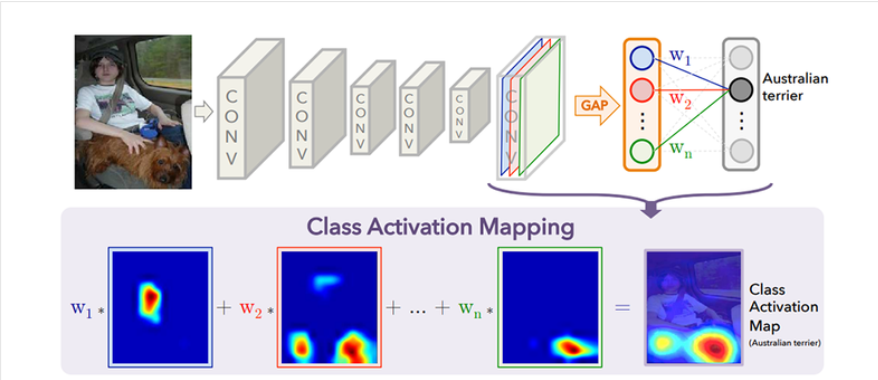
http://cnnlocalization.csail.mit.edu/Zhou_Learning_Deep_Features_CVPR_2016_paper.pdf


```
용어정리
1) GAP(Global Average Pooling)
- 분류 모델의 마지막 부분에서 fully connected layer 대신 GAP을 사용
- 일반적으로 이미지 분류에서는 여러 CNN 레이어를 거쳐 우선 특성을 추출하고, 그 특성 맵을 flattening 한 후 fully connected layer에 입력해 줌으로써 각 클래스에 따른 logit을 구하고 최종적으로 활성화 함수를 거치게 한다.
- 그러나 Network in Network 논문에서는 CNN 이후 fully connected layer 대신 GAP 연산
- 매 채널별로, average pooling을 채널의 값 전체에 global하게 적용
- 특성 맵의 각 채널이 클래스별 신뢰도를 나타내게 되어 해석이 쉬울 뿐만 아니라, fully connected layer와 달리 최적화할 파라미터가 존재하지 않으므로 과적합(overfitting)을 방지

```

### Grad-CAM
- Grad-CAM(Gradient CAM)은 CAM의 모델의 구조가 제한되는 문제를 해결하고, 다양한 모델의 구조를 해석

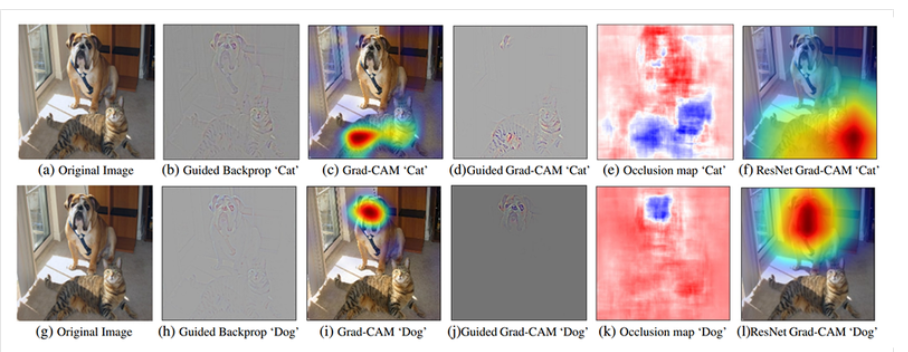
- 위의 이미지는 개와 고양이가 있는 이미지에 대해서 Guided Backprop, Grad-CAM, Occlussion map의 시각화를 비교하고 있다. Grad-CAM에서는 높은 분별력과 큰 dimension을 갖는 CAM을 만드는 것을 중요하게 보았다.
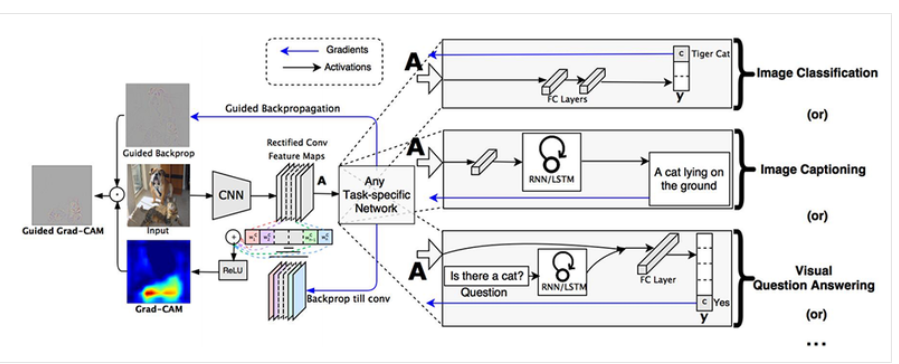
- 위에서 보았던 이미지를 입력으로 CNN을 거쳐 특성 맵을 추출하고 그 뒤로 태스크에 따라서 다양한 레이어들이 사용된다.
- 오른쪽의 "Image Classification"과 "Image captioning", "Visual question Answering"은 Grad-CAM이 적용될 수 있는 다양한 컴퓨터 비전 문제들을 설명
- Image Classification은 익히 들어오셨겠지만 Image Captioning이나 Visual Question answering은 생소하실 텐데요, Image Captioning은 이미지에 대한 설명을 만들어내는 태스크이다.
- Visual question answering은 VQA라고도 불리며, 어떤 질문과 이미지가 주어졌을 때 이에 대한 답변을 내는 태스크이다.
- Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없으며, 분류 문제 외의 다른 태스크들에 유연하게 대처할 수 있다.
- 그래디언트를 통한 Weight Score 계산

### ACoL: Adversarial Complementary Learning
- CAM에서 신기한 점은 클래스와 이미지만을 데이터로 학습을 하는데 덤으로 위치 정보까지 얻을 수 있다는 것
- 직접적으로 정답 위치 정보를 주지 않아도 간접적인 정보를 활용하여 학습하고 원하는 정보를 얻어낼 수 있도록 모델을 학습하는 방식을 약지도학습(weakly supervised learning)이라고 한다.

1. 약지도학습(weakly supervised learning)
- incomplete supervision : 학습 데이터 중 일부에만 라벨이 달린 경우. 일반적으로 말하는 준지도학습과 같은 경우임. (예: 개와 고양이 분류 학습 시 10,000개의 이미지 중 1,000개만 라벨이 있는 경우)
- inexact supervision : 학습데이터의 라벨이 충분히 정확하게 달려있지 않은 경우. (예: 개나 고양이를 Object Detection 또는 Semantic Segmentation해야 하지만 이미지 내에 정확한 bounding box는 주어져 있지 않고 이미지가 개인지 고양인지 정보만 라벨로 달려있는 경우)
- inaccurate supervision : 학습 데이터에 Noise가 있는 경우, (예: 개나 고양이의 라벨이 잘못 달린 경우)

EX) inexact supervision - Grad-CAM 논문에서 언급한 약지도학습을 통한 Object Detection과 Semantic Segmentation의 예시
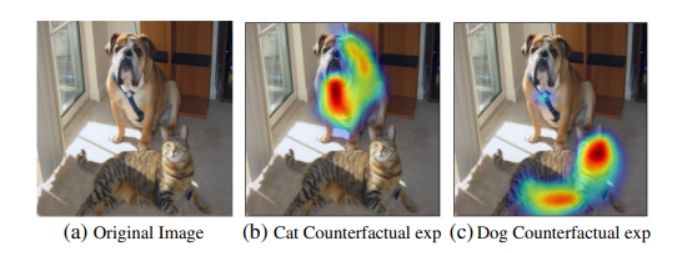
1) Grad-CAM을 통해서는 개와 고양이의 특징이 두드러지게 하는 영역의 가중치 점수를 계산할 수 있었지만, 해당 가중치 점수를 제거해 주면 Image classification 모델에서 해당 클래스에 대한 prediction이 바뀌게 될 수도 있다. 가중치 점수를 제거했을 때 prediction이 바뀌도록 하는 가중치 영역을 모으면 bounding box 라벨을 한 번도 보지 않고서도 object detection을 해낼 수 있다는 것이다.

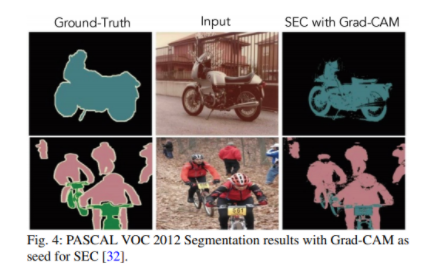
2) Grad-CAM을 이용해서, 위와 비슷한 논리로 Semantic Segmentation도 수행 가능함을 보여준다.

3) 네이버랩스의 이미지기반의 차선변경 알고리즘(SLC)
https://www.naverlabs.com/storyDetail/16



2. Adversarial Complementary Learning
- 논문 제목에서 사용된 Adversarial Complementary Learning (ACoL) 모델의 학습에는 끝단이 두 브랜치(branch)로 나뉜다. CAM을 만들기 위해 활용했던 특성 맵을 두 가지로 분리한 것이다.
- CAM을 통해 본 활성화 맵을 보면 가장자리보다는 특징이 주로 나타나는 위치에 중점적으로 활성화되는 모습을 볼 수 있다.
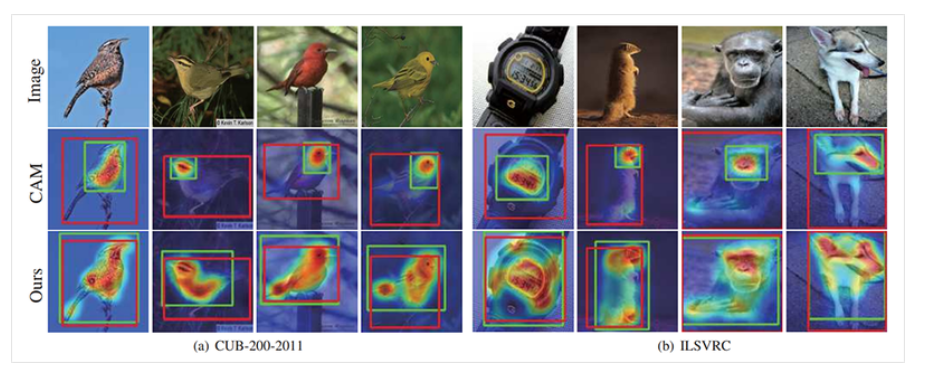
- CAM 모델이 특정 부위에 집중해 학습하는 것을 막기 위해서 ACoL은 브랜치를 두 가지로 두어 너무 높은 점수를 지워줌으로써 주변의 특성 또한 반영하도록 했다.
- ACoL의 구조를 살펴보면 먼저 위쪽 주황색 브랜치를 거친다. 특성 맵은 GAP을 거쳐 CAM에서 보았던 소프트맥스 레이어인 Classifier A를 거치게 된다. 이 브랜치는 loss로 학습된다.
- ACoL은 여기서 얻어진 활성화 맵을 적대적인 방법으로 사용-> 일정 값 이상 활성화된 활성화 맵을 지우도록 하는 것이다.
- Classifier A는 쉽게 전체적인 이미지를 보고 클래스를 판별할 수 있는 반면에 Classifier B는 A의 CAM에서 크게 활성화된 영역을 지운 활성화 맵에서 분류를 해야 하기 때문에 더 어려운 문제를 푸는 것으로 볼 수 있다.
- 이렇게 두 가지 Classifier A와 Classifier B를 학습시킴으로써 더 넓은 영역을 판별의 근거로 삼을 수 있다. 이 과정을 통해서 모델은 쉽게 맞출 수 있는 샘플을 어렵게 다시 한 번 학습을 하는 Adversarial Complementary Learning 과정을 거치게 된다.

3. 1x1 Conv
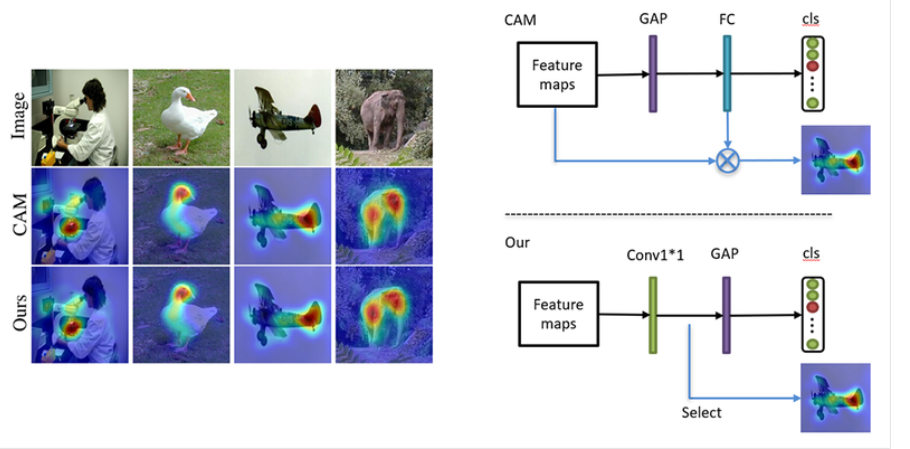
- CAM에서는 CAM을 얻기 위해서 대상이 되는 네트워크에 feed forward를 하고 활성화 맵과 가중치 계산을 다시 해주어야 한다.
- 물체 검출을 위한 모델로 사용하기 위해서는 모델의 feed forward 외 별도의 연산을 해주어야 하는 단점이 있다.
- ACoL 논문은 이를 개선하기 위해서 커널 사이즈는 1x1, 출력 채널의 개수는 분류하고자 하는 클래스 개수를 가진 컨볼루션 레이어를 특성 맵에 사용하고 여기에 GAP를 적용하여 Network in Network에서 본 구조와 유사한 방식을 사용하고 있다.
- 여기서 컨볼루션 레이어의 출력값은 곧바로 활성화 맵이 됩니다. 이렇게 구해진 활성화 맵과 CAM을 비교한 결과를 위 그림의 왼쪽에서 볼 수 있다.